In [1]:
# Biblotecas de manipulação de dados
import numpy as np
import pandas as pd
# Bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt
# Testes estatísticos
from scipy.stats import ttest_ind
# Bibliotecas Locais
from carga import *
from tratamentos import *
from categorizacao import *
 
pfEnade = doCarga('microdados_enade_2019.txt')
# TRATAMENTOS 
pfEnade = doIdade(pfEnade)
pfEnade = doNota(pfEnade)
pfEnade = doVazios(pfEnade)
pfEnade = doPublicoPrivada(pfEnade)
pfEnade = doHumanasExatas(pfEnade)
pfEnade = doRenda(pfEnade)
pfEnade = doMigracao(pfEnade)
# TRATAMENTOS - Dicionários
pfEnade = doRenda(pfEnade)
#pfEnade['Renda'].value_counts().sort_index()
# pfEnade.isna().sum()    # Mostra se há vazios
pfEnade = doEscolaridade(pfEnade)

In [2]:
# TABELA - ÚTIL - Incluído
# Renda Familiar X Nota
tmp = pfEnade.groupby('QE_I08')['NT_GER'].agg(['mean', 'std', 'count']).sort_index()
tmp.index = pd.Series(tmp.index).replace(doRendaDIC())
# tmp.index.name = 'Qual a renda total de sua família, incluindo seus rendimentos?'
tmp.index.name = 'Total Income'
tmp 

,mean,std,count
Total Income,,,
"< 1,5 salary",41.365169,13.988221,60940
"1,5 to 3 salary",42.788669,13.885542,93186
"3 to 4,5 salary",44.500582,14.124104,66823
"4,5 to 6 salary",46.036157,14.314582,37581
6 to 10 salary,48.083174,14.407230,40163
10 to 30 salary,51.244375,14.210903,27342
> 30 salary,53.146937,13.908866,5714


<AxesSubplot:>

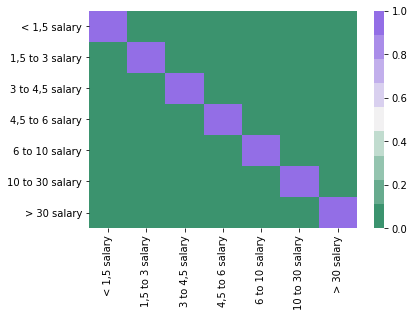

In [3]:
# MAPA CALOR - ÚTIL - Incluído
# CORRELAÇÂO - Renda Familiar e Nota
lista_de_listas = []
valores = sorted(pfEnade['QE_I08'].dropna().unique().tolist())
for i in valores:
    lista_de_listas.append([])
    for j in valores:
        t_res = ttest_ind(pfEnade.query(f'QE_I08 == @i')['NT_GER'], pfEnade.query(f'QE_I08 == @j')['NT_GER'])
        lista_de_listas[-1].append(t_res.pvalue)

valores = pd.Series(valores).replace(doRendaDIC())
tmp = pd.DataFrame(lista_de_listas, index=valores, columns=valores)    

sns.heatmap(tmp, cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9))

In [4]:
# TABELA - ÚTIL - Incluído
# Horas de Estudo X Renda Familiar
tmp = pfEnade.groupby('QE_I23')['NT_GER'].agg(['mean', 'std', 'count']).sort_index()
tmp.index = pd.Series(tmp.index).replace(doHEstudoDIC())
#tmp.index.name = 'Horas de estudo extra classe?'
tmp.index.name = 'Extra class hours of study'
tmp 

,mean,std,count
Extra class hours of study,,,
None,40.557284,14.215812,11464
1 to 3,41.679172,13.734239,129434
4 to 7,45.185336,14.112325,100623
8 to 12,47.881736,14.341047,45887
> 12,50.615264,14.548611,44341


<AxesSubplot:>

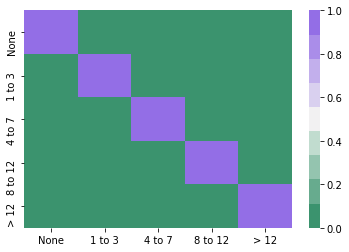

In [5]:
# MAPA CALOR - ÚTIL - NÂO incluído
# CORRELAÇÂO entre os grupos de horas de estudos
lista_de_listas = []
valores = sorted(pfEnade['QE_I23'].dropna().unique().tolist())
for i in valores:
    lista_de_listas.append([])
    for j in valores:
        t_res = ttest_ind(pfEnade.query(f'QE_I23 == @i')['NT_GER'], pfEnade.query(f'QE_I23 == @j')['NT_GER'])
        lista_de_listas[-1].append(t_res.pvalue)

valores = pd.Series(valores).replace(doHEstudoDIC())
tmp = pd.DataFrame(lista_de_listas, index=valores, columns=valores)    

sns.heatmap(tmp, cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9))

In [6]:
# TABELA - ÚTIL 
# AGRUPANDO Renda X Horas de Estudo X Nota Média
tmp = pfEnade.groupby(['QE_I08', 'QE_I23'])['NT_GER'].agg(['mean']).unstack()
    
tmp.index = pd.Series(tmp.index).replace(doRendaDIC())
#tmp.index.name = 'Qual a renda total de sua família, incluindo seus rendimentos?'
tmp.index.name = 'Total Income'

tmp.columns = tmp.columns.droplevel(0)
tmp.columns = pd.Series(tmp.columns).replace(doHEstudoDIC())
#tmp.columns.name = 'Quantas horas por semana, aproximadamente, você dedicou aos estudos, excetuando as horas de aula?'
tmp.columns.name = 'Extra class hours of study'
   
tmp 

Extra class hours of study,None,1 to 3,4 to 7,8 to 12,> 12
Total Income,,,,,
"< 1,5 salary",37.270872,38.691035,42.081649,44.264852,46.804682
"1,5 to 3 salary",38.983721,40.377314,43.278309,45.642316,48.196353
"3 to 4,5 salary",40.533216,41.764928,44.950857,47.559729,49.908128
"4,5 to 6 salary",41.762222,43.140893,46.423930,48.671870,51.485442
6 to 10 salary,42.265164,44.823654,48.268851,51.136292,53.465406
10 to 30 salary,45.081802,47.749831,51.064465,53.833326,56.250549
> 30 salary,46.349110,49.276893,52.646534,55.390021,57.933069


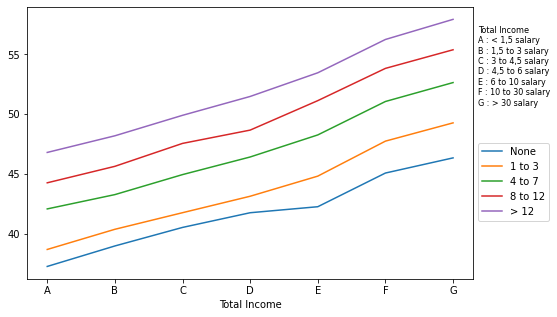

In [7]:
# TABELA - Potencial útil
tmp = pfEnade.groupby(['QE_I08', 'QE_I23'])['NT_GER'].agg(['mean']).unstack() #.where(pfEnade.QE_I08 != ' ')
    
#tmp.index = pd.Series(tmp.index).replace(doRendaDIC())
#tmp.index.name = 'Qual a renda total de sua família, incluindo seus rendimentos?'
# tmp.index.name = 'Renda total familiar'
tmp.index.name = 'Total Income'

tmp.columns = tmp.columns.droplevel(0)

tmp.columns = pd.Series(tmp.columns).replace(doHEstudoDIC())
#tmp.columns.name = 'Quantas horas por semana, aproximadamente, você dedicou aos estudos, excetuando as horas de aula?'
#tmp.columns.name = 'Horas por semana extra classe'
tmp.columns.name = 'Extra class hours of study'
    
ax = tmp.plot(figsize=(8, 5)) 
#ax.set_title('Nota X Renda X Horas', fontsize=15)

#textoRenda = "Renda Familiar\n"
textoRenda = "Total Income\n"
for key, value in doRendaDIC().items():
    textoRenda = textoRenda + "{k} : {v}\n".format(k=key, v=value)
ax.text(1.01, 0.6, textoRenda, transform=ax.transAxes, fontsize=8)

#textoEstudo = ""
#for key, value in doRendaDIC().items():
#    textoEstudo = textoEstudo + "{k} : {v}\n".format(k=key, v=value)
#ax.legend(textoEstudo)
ax.legend(bbox_to_anchor=(1.01, 0.5), loc='upper left', borderaxespad=0.)

<AxesSubplot:xlabel='Extra class hours of study', ylabel='Total Income'>

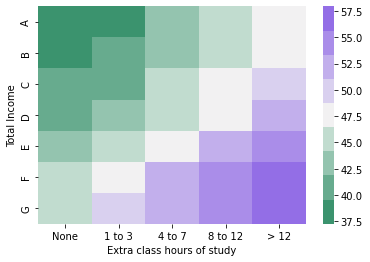

In [8]:
#MAPA CALOR - Potencial útil
sns.heatmap(data=tmp, cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9), )

In [9]:
# TABELA - Possívelmente útil
# Gênero X Nota
tmp = pfEnade.groupby('TP_SEXO')['NT_GER'].agg(['mean', 'std', 'count']).sort_index()
tmp.index = pd.Series(tmp.index).replace(doSexoDIC())
tmp.index.name = 'Sex'
tmp 

,mean,std,count
Sex,,,
Feminino,45.288984,14.153478,186146
Masculino,44.074999,14.732116,145603


In [10]:
# TABELA - Possívelmente útil
# Gênero X Nota
tmp.div(tmp.iloc[1])

,mean,std,count
Sex,,,
Feminino,1.027544,0.960723,1.278449
Masculino,1.000000,1.000000,1.000000


In [11]:
# TABELA - Utilidade não definida
# Sexo X Renda
SxR = pfEnade.groupby(['TP_SEXO', 'QE_I08'])['NT_GER'].agg(['count']).unstack()
    
SxR.index = pd.Series(SxR.index).replace(doSexoDIC())
SxR.index.name = 'Sex'

SxR.columns = SxR.columns.droplevel(0)
SxR.columns = pd.Series(SxR.columns).replace(doRendaDIC())
#SxR.columns.name = 'Qual a renda total de sua família, incluindo seus rendimentos?'
SxR.columns.name = 'Total Income'
    
SxR 

Total Income,"< 1,5 salary","1,5 to 3 salary","3 to 4,5 salary","4,5 to 6 salary",6 to 10 salary,10 to 30 salary,> 30 salary
Sex,,,,,,,
Feminino,38402,55850,36561,19573,20501,12679,2580
Masculino,22538,37336,30262,18008,19662,14663,3134


In [12]:
# BUG
#fig, ax = plt.subplots(figsize=(16,8))
#plt.suptitle('Título Plot')
#SxR.filter(items=['TP_SEXO', 'QE_I08', 'NT_GER'])\
#    .groupby(['TP_SEXO', 'QE_I08'])\
#    .mean().sort_values(by='NT_GER', ascending=False)\
#    .unstack().plot(ax=ax)

In [13]:
SxR.div(SxR.iloc[1])

Total Income,"< 1,5 salary","1,5 to 3 salary","3 to 4,5 salary","4,5 to 6 salary",6 to 10 salary,10 to 30 salary,> 30 salary
Sex,,,,,,,
Feminino,1.703878,1.495875,1.208149,1.086906,1.042671,0.864693,0.823229
Masculino,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# TABELA - Não útil
# Migrado X Renda X Nota
xq = pfEnade.where(pfEnade.Migrado == 1)
#xq = xq.where(xq.NT_GER != ' ')
#xq = xq.where(xq.NT_GER > 0)
#xq = xq.where(xq.QE_I08 != ' ')

MxR = xq.groupby(['NT_GER', 'QE_I08'])['Migrado'].agg(['count']).unstack()
    
MxR.index = pd.Series(MxR.index).replace(doMigradoDIC())
MxR.index.name = 'Migrado'

MxR.columns = MxR.columns.droplevel(0)
MxR.columns = pd.Series(MxR.columns).replace(doRendaDIC())
MxR.columns.name = 'Qual a renda total de sua família, incluindo seus rendimentos?'
    
MxR 

"Qual a renda total de sua família, incluindo seus rendimentos?","< 1,5 salary","1,5 to 3 salary","3 to 4,5 salary","4,5 to 6 salary",6 to 10 salary,10 to 30 salary,> 30 salary
Migrado,,,,,,,
1.5,1,0,0,0,0,0,0
2.2,2,0,0,0,0,0,0
2.3,0,0,1,0,0,0,0
2.6,0,1,0,0,0,0,0
2.7,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...
85.1,0,0,1,0,0,0,0
85.4,0,1,0,0,0,0,0
85.7,0,0,1,0,1,0,0


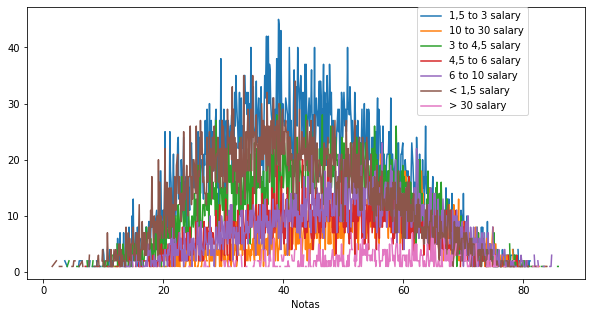

In [15]:
# DISTRIBUIÇÂO - UTIL - Utilizado
#tmp = pfEnade.groupby(['QE_I08', 'QE_I23'])['NT_GER'].agg(['mean']).unstack() #.where(pfEnade.QE_I08 != ' ')
# MxR = pfEnade.groupby(['NT_GER', 'QE_I08'])['Migrado'].agg(['count']).unstack().where('NT_GER > 0')
#MxR = pfEnade.groupby(['NT_GER', 'QE_I08'])['Migrado'].agg(['count']).unstack().where(pfEnade.NT_GER != ' ')
xq = pfEnade.where(pfEnade.Migrado == 1)
MxR = xq.groupby(['NT_GER',  'RendaDIC'])['Migrado']\
    .agg(['count'])\
    .unstack()
    
MxR.index.name = 'Notas'

MxR.columns = MxR.columns.droplevel(0)
MxR.columns.name = 'Renda'
    
ax = MxR.plot(figsize=(10,5)) 
ax.legend(bbox_to_anchor=(0.7, 1), loc=2, borderaxespad=0.)

#ax.set_title('Nota X Renda X Migração', fontsize=20)

# textoRenda = ""
# for key, value in doRendaDIC().items():
#    textoRenda = textoRenda + "{k} : {v}\n".format(k=key, v=value)
#ax.text(0.05, 0.6, textoRenda, transform=ax.transAxes, fontsize=8)

#textoEstudo = ""
#for key, value in doRendaDIC().items():
#    textoEstudo = textoEstudo + "{k} : {v}\n".format(k=key, v=value)
#ax.legend(textoEstudo)